In [ ]:
%pip install matplotlib

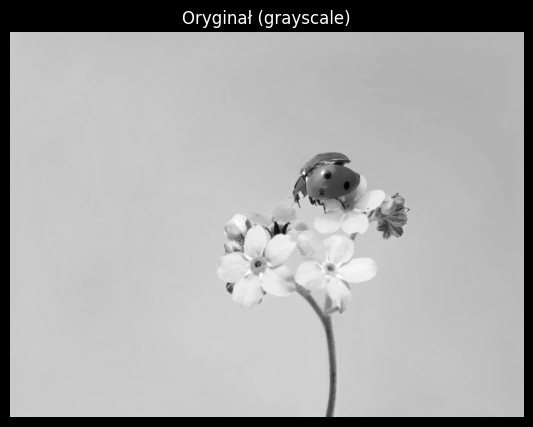

Rozmiar macierzy obrazu: (600, 800)
Minimalna liczba składowych dla 90%: 1


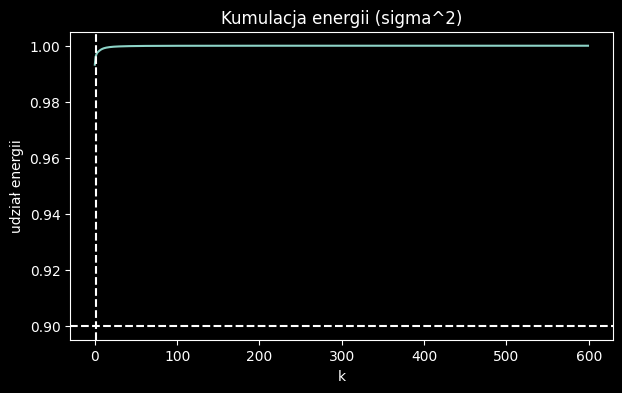

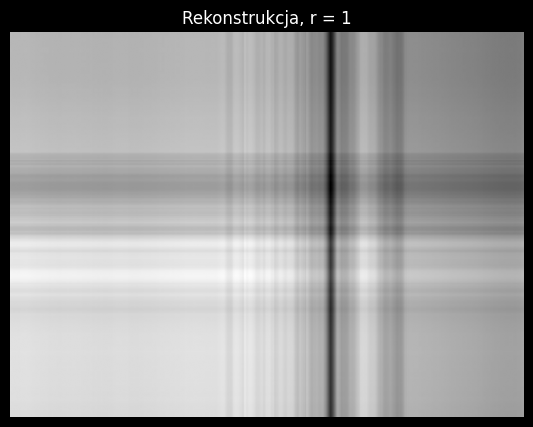

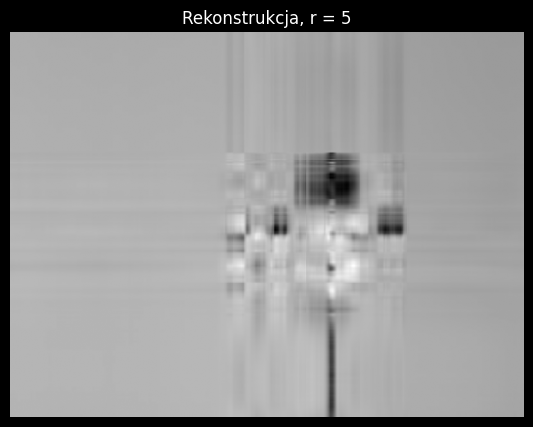

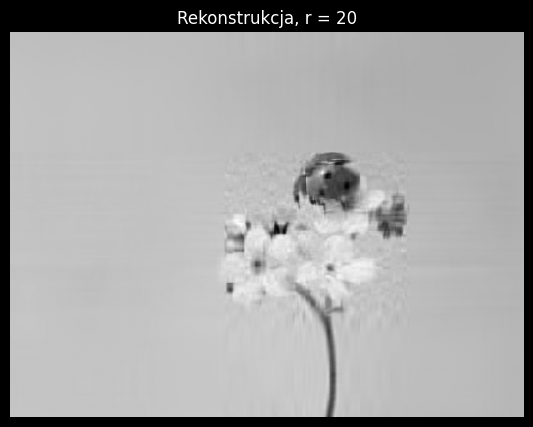

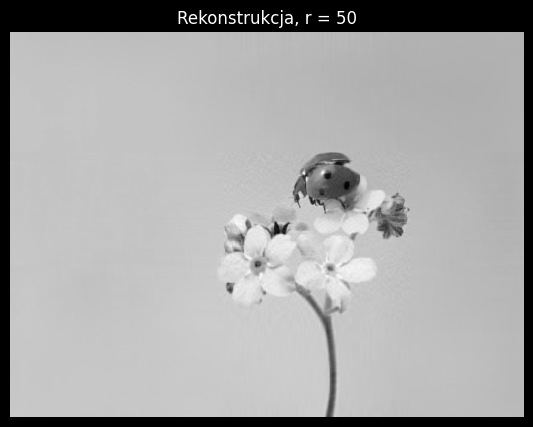

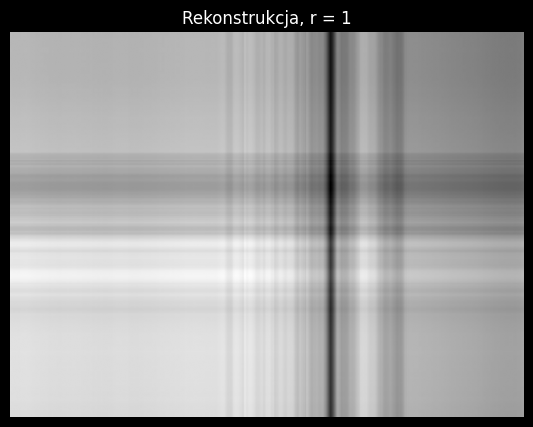

In [3]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt

A = imread("data/lab1_10.webp")
X = np.mean(A, axis=2)

plt.figure(figsize=(8,5))
plt.imshow(X, cmap="gray")
plt.axis("off")
plt.title("Oryginał (grayscale)")
plt.show()

print("Rozmiar macierzy obrazu:", X.shape)

XXT = X.astype(np.float64) @ X.astype(np.float64).T
eigvals = np.linalg.eigvalsh(XXT)[::-1]

cum = np.cumsum(eigvals)
total = cum[-1]

k90 = np.searchsorted(cum, 0.9 * total) + 1
print("Minimalna liczba składowych dla 90%:", k90)

plt.figure(figsize=(7,4))
plt.plot(cum / total)
plt.axhline(0.9, linestyle="--")
plt.axvline(k90, linestyle="--")
plt.title("Kumulacja energii (sigma^2)")
plt.xlabel("k")
plt.ylabel("udział energii")
plt.show()

U, s, VT = np.linalg.svd(X, full_matrices=False)

def reconstruct(k):
    return (U[:, :k] * s[:k]) @ VT[:k, :]

for k in [1, 5, 20, 50, k90]:
    Xk = reconstruct(k)
    plt.figure(figsize=(8,5))
    plt.imshow(Xk, cmap="gray")
    plt.axis("off")
    plt.title(f"Rekonstrukcja, r = {k}")
    plt.show()

